In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df=pd.read_excel("/Users/sarfarazahamed1/Desktop/Winter_2020-21/FMOB/Project/dataset.xlsx",index_col=0)

In [3]:
df.head()

,Gender,Age_Group,Age,Marital_Status,Race,Religion,Tenure,Highest_Education,G1,G2,...,JobDemand_Workload,JobDemand_Emo,JobDemand_Cog,JOB_DEMAND,JobInsecurity_Imp,JobInsecurity_Prob,JOB_INSECURITY,Level_Presenteesim,Level_JobDemand,Level_JobInsecurity
ID,,,,,,,,,,,,,,,,,,,,,
A1,1,2,28,2,1,1,2,4,2,3,...,12,20,17,49,27,31,58,Medium,Medium,Medium
A2,2,1,25,2,1,1,2,3,5,3,...,13,18,7,38,43,30,73,Medium,Low,High
A3,1,2,28,2,1,1,2,3,3,5,...,20,18,9,47,43,45,88,Medium,Medium,High
A4,2,2,30,2,1,1,3,3,4,4,...,17,20,13,50,36,25,61,Medium,Medium,Medium
A5,2,2,33,2,1,1,2,3,5,5,...,13,19,25,57,13,21,34,High,Medium,Low


In [20]:
df1=df.loc[:,'P_Complete_Task':'JOB_INSECURITY']

In [21]:
df1.head()

,P_Complete_Task,P_Avoid_Dist,PRESENTEEISM,JobDemand_Workload,JobDemand_Emo,JobDemand_Cog,JOB_DEMAND,JobInsecurity_Imp,JobInsecurity_Prob,JOB_INSECURITY
ID,,,,,,,,,,
A1,10,7,17,12,20,17,49,27,31,58
A2,9,11,20,13,18,7,38,43,30,73
A3,10,10,20,20,18,9,47,43,45,88
A4,11,12,23,17,20,13,50,36,25,61
A5,15,15,30,13,19,25,57,13,21,34


# Affect of Job Insecurity on Presenteeism

Text(0, 0.5, 'Presenteeism')

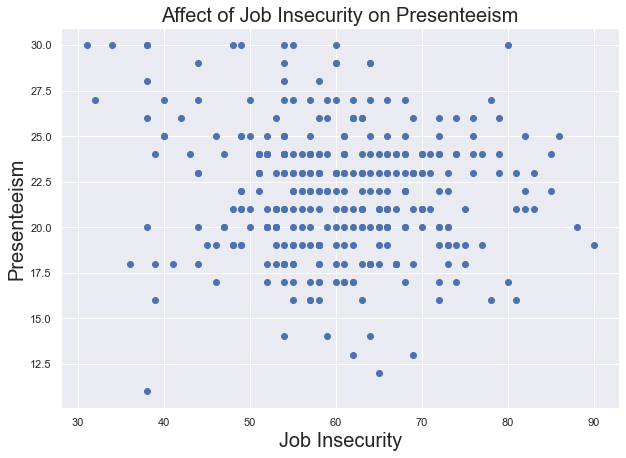

In [52]:
fig, ax = plt.subplots(figsize=(10,7))
x1=df1['JOB_INSECURITY']
y=df1['PRESENTEEISM']
ax.scatter(x1,y)
ax.set_title('Affect of Job Insecurity on Presenteeism',fontsize=20)
ax.set_xlabel('Job Insecurity',fontsize=20)
ax.set_ylabel('Presenteeism',fontsize=20)

In [37]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.params

const             23.920007
JOB_INSECURITY    -0.033544
dtype: float64

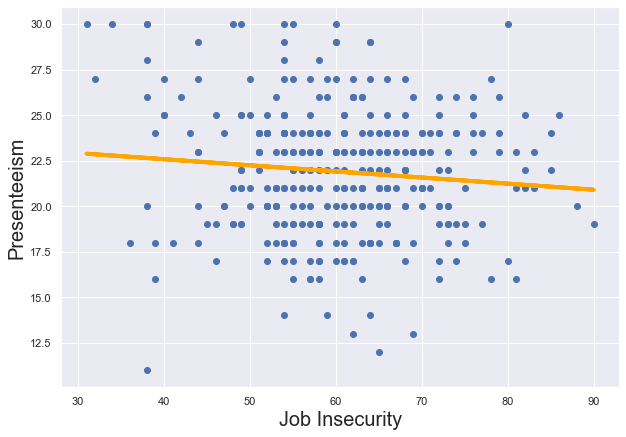

In [83]:
plt.figure(figsize=(10,7))
plt.scatter(x1,y)
yhat = -0.033544*x1 + 23.92007
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('Job Insecurity', fontsize = 20)
plt.ylabel('Presenteeism', fontsize = 20)
plt.show()

# Affect of Job Insecurity Importance and Probability on Presenteeism

Text(0.5, 0, 'Presenteeism')

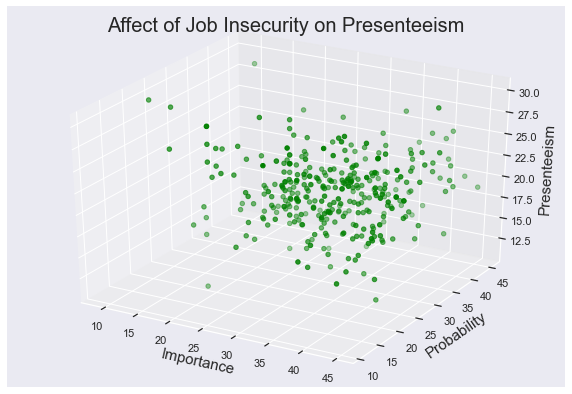

In [51]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
x1=df1['JobInsecurity_Imp']
x2=df1['JobInsecurity_Prob']
y=df1['PRESENTEEISM']
ax.scatter(x1,x2,y, color='green')
ax.set_title('Affect of Job Insecurity on Presenteeism',fontsize=20)
ax.set_xlabel('Importance',fontsize=15)
ax.set_ylabel('Probability',fontsize=15)
ax.set_zlabel('Presenteeism',fontsize=15)

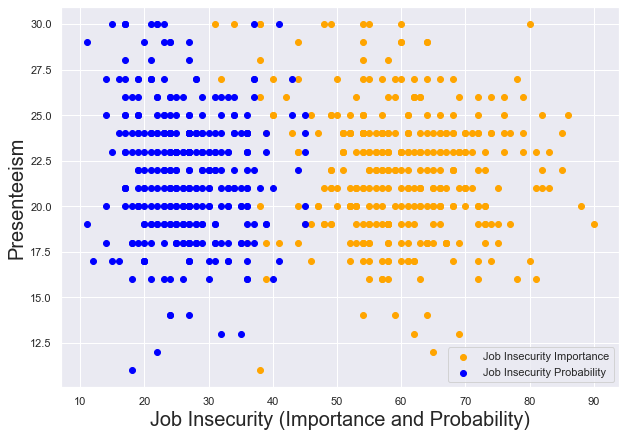

In [90]:
plt.figure(figsize=(10,7))
plt.scatter(x1,y,color='orange')
plt.scatter(x2,y,color='blue')
yhat1 = -0.026400*x1 + 23.877850
plt.xlabel('Job Insecurity (Importance and Probability)', fontsize = 20)
plt.ylabel('Presenteeism', fontsize = 20)
plt.legend(labels=['Job Insecurity Importance','Job Insecurity Probability'])

In [68]:
X = df1[['JobInsecurity_Imp','JobInsecurity_Prob']]
X = sm.add_constant(X)
results = sm.OLS(y,X).fit()
results.params

const                 23.877850
JobInsecurity_Imp     -0.026400
JobInsecurity_Prob    -0.041058
dtype: float64

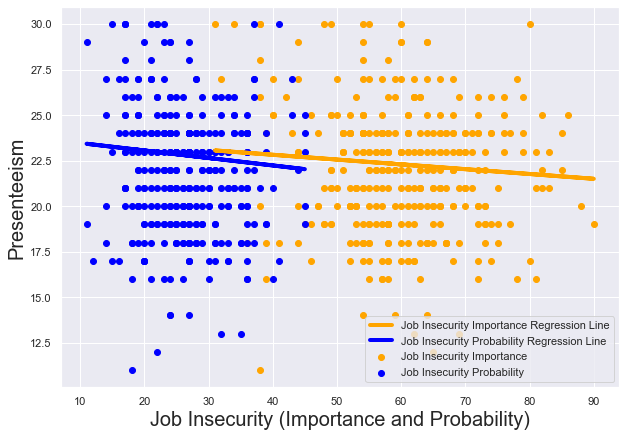

In [89]:
plt.figure(figsize=(10,7))
plt.scatter(x1,y,color='orange')
plt.scatter(x2,y,color='blue')
yhat1 = -0.026400*x1 + 23.877850
yhat2 = -0.041058*x2 + 23.877850
fig1 = plt.plot(x1,yhat1, lw=4, c='orange', label ='regression line')
fig2 = plt.plot(x2,yhat2, lw=4, c='blue', label ='regression line')
plt.xlabel('Job Insecurity (Importance and Probability)', fontsize = 20)
plt.ylabel('Presenteeism', fontsize = 20)
plt.legend(labels=['Job Insecurity Importance Regression Line','Job Insecurity Probability Regression Line','Job Insecurity Importance','Job Insecurity Probability'])